<a href="https://colab.research.google.com/github/JsNcAr/Metodos1_JasonArias_AngieRicaurte/blob/ramaALRR/Ejercicio_4_Metropolis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

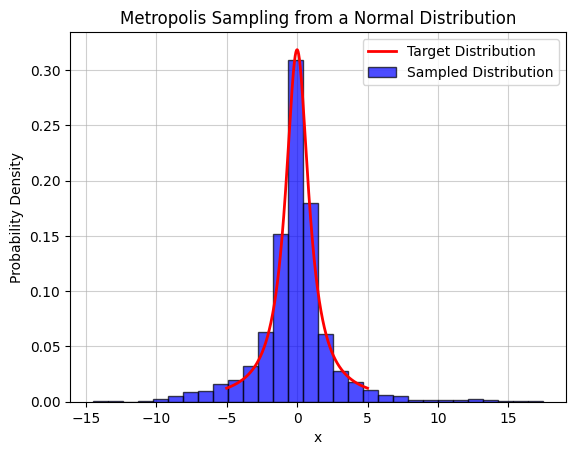

In [8]:
def distribucion_objetivo(x):
    return 1/(np.pi*(1 + x**2))

def algoritmo_metropolis(n_iteraciones, x_inicial, desviacion_propuesta):
    muestras = [x_inicial]
    x_actual = x_inicial

    for _ in range(n_iteraciones):
        x_propuesto = np.random.normal(
            x_actual, desviacion_propuesta
        )  # Distribución propuesta utilizando una distribución normal
        proporcion_aceptacion = min(
            1,
            distribucion_objetivo(x_propuesto) /
            distribucion_objetivo(x_actual))

        if np.random.uniform() < proporcion_aceptacion:
            x_actual = x_propuesto

        muestras.append(x_actual)

    return muestras

n_iterations = 10000
initial_x = 0  # Valor inicial para x
proposal_sd = 1  # Desviación estándar de la distribución propuesta

samples = algoritmo_metropolis(n_iterations, initial_x, proposal_sd)

# Plot the sampled distribution
plt.figure()
plt.hist(samples,
         bins=30,
         density=True,
         alpha=0.7,
         color='b',
         edgecolor='black', zorder=2)
x_values = np.linspace(-5, 5, 1000)
plt.plot(x_values, distribucion_objetivo(x_values), 'r', linewidth=2, zorder=3)
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.title('Metropolis Sampling from a Normal Distribution')
plt.legend(['Target Distribution', 'Sampled Distribution'])
plt.grid(True, alpha=0.6, zorder=1)
plt.show()



